In [2]:
# Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [3]:

#Loading the datasets
df1 = pd.read_csv("datafile (1).csv")

df3 = pd.read_csv("datafile (3).csv")


# Clean column names for easier manipulation and to remove special characters
df1.columns = [
    'Crop',
    'State',
    'Cost_of_Cultivation_A2_FL',
    'Cost_of_Cultivation_C2',
    'Cost_of_Production_C2',
    'Yield'
]

# The last column in df3 is empty, so we drop it
df3.columns = [
    'Crop',
    'Variety',
    'Season_Duration',
    'Recommended_Zone',
    'Extra_Col'
]
df3 = df3.drop('Extra_Col', axis=1)

# Standardize the 'Crop' column in both dataframes for a perfect merge.
# We will remove leading/trailing spaces and convert all to lowercase.
df1['Crop'] = df1['Crop'].str.strip().str.lower()
df3['Crop'] = df3['Crop'].str.strip().str.lower()

print("Original shape of datafile (1):", df1.shape)
print("Original shape of datafile (3):", df3.shape)


Original shape of datafile (1): (49, 6)
Original shape of datafile (3): (78, 4)


In [4]:

# Merging the Datasets

merged_df = pd.merge(df1, df3, on='Crop', how='left')

print("\nShape of the merged dataset:", merged_df.shape)
print("First 5 rows of the merged dataset:")
print(merged_df.head())



Shape of the merged dataset: (171, 9)
First 5 rows of the merged dataset:
    Crop           State  Cost_of_Cultivation_A2_FL  Cost_of_Cultivation_C2  \
0  arhar   Uttar Pradesh                    9794.05                23076.74   
1  arhar       Karnataka                   10593.15                16528.68   
2  arhar         Gujarat                   13468.82                19551.90   
3  arhar  Andhra Pradesh                   17051.66                24171.65   
4  arhar     Maharashtra                   17130.55                25270.26   

   Cost_of_Production_C2  Yield Variety Season_Duration Recommended_Zone  
0                1941.55   9.83     NaN             NaN              NaN  
1                2172.46   7.47     NaN             NaN              NaN  
2                1898.30   9.59     NaN             NaN              NaN  
3                3670.54   6.42     NaN             NaN              NaN  
4                2775.80   8.72     NaN             NaN              NaN  


In [5]:
# Handling Missing Values after Merging

merged_df[['Variety', 'Season_Duration', 'Recommended_Zone']] = merged_df[['Variety', 'Season_Duration', 'Recommended_Zone']].fillna('Not Available')

print("\nFirst 5 rows after filling missing values:")
print(merged_df.head())



First 5 rows after filling missing values:
    Crop           State  Cost_of_Cultivation_A2_FL  Cost_of_Cultivation_C2  \
0  arhar   Uttar Pradesh                    9794.05                23076.74   
1  arhar       Karnataka                   10593.15                16528.68   
2  arhar         Gujarat                   13468.82                19551.90   
3  arhar  Andhra Pradesh                   17051.66                24171.65   
4  arhar     Maharashtra                   17130.55                25270.26   

   Cost_of_Production_C2  Yield        Variety Season_Duration  \
0                1941.55   9.83  Not Available   Not Available   
1                2172.46   7.47  Not Available   Not Available   
2                1898.30   9.59  Not Available   Not Available   
3                3670.54   6.42  Not Available   Not Available   
4                2775.80   8.72  Not Available   Not Available   

  Recommended_Zone  
0    Not Available  
1    Not Available  
2    Not Available  


In [6]:
# Data Preprocessing 

df_encoded = pd.get_dummies(merged_df, columns=['Crop', 'State', 'Variety', 'Season_Duration', 'Recommended_Zone'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop('Yield', axis=1)
y = df_encoded['Yield']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:

#Model Training and Evaluation


# Model 1: Linear Regression
print("\nTraining Linear Regression Model...")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Calculate and print metrics for Linear Regression
r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression R^2 Score: {r2_linear:.4f}")
print(f"Linear Regression Mean Squared Error: {mse_linear:.4f}")

# Model 2: Random Forest Regressor
print("\nTraining Random Forest Regressor Model...")
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# Calculate and print metrics for Random Forest Regressor
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest R^2 Score: {r2_rf:.4f}")
print(f"Random Forest Mean Squared Error: {mse_rf:.4f}")

# Determine the better model
best_model = random_forest_model if r2_rf > r2_linear else linear_model
print("\nBased on the R^2 score, the better model is:", type(best_model).__name__)



Training Linear Regression Model...
Linear Regression R^2 Score: 0.9446
Linear Regression Mean Squared Error: 1501.3239

Training Random Forest Regressor Model...
Random Forest R^2 Score: 0.9988
Random Forest Mean Squared Error: 31.5877

Based on the R^2 score, the better model is: RandomForestRegressor


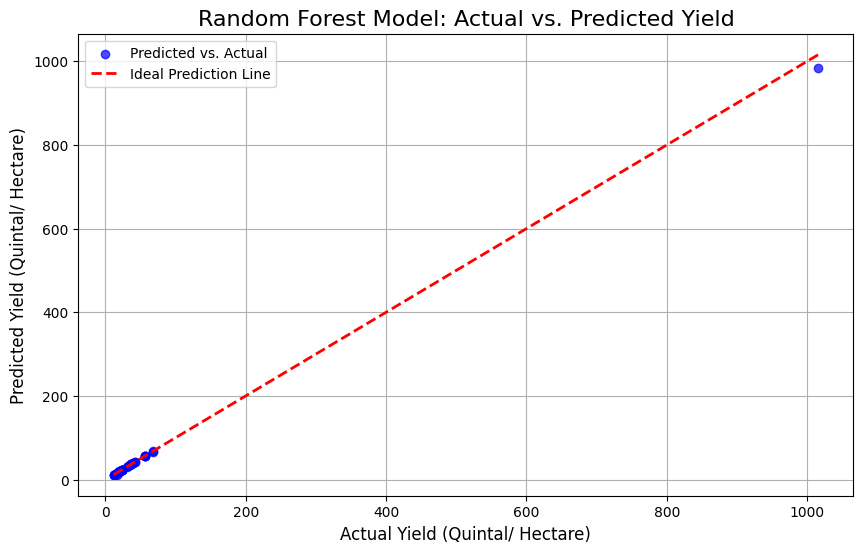

In [11]:
# Plot 1: Actual vs. Predicted Yield
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='b', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Prediction Line')
plt.title('Random Forest Model: Actual vs. Predicted Yield', fontsize=16)
plt.xlabel('Actual Yield (Quintal/ Hectare)', fontsize=12)
plt.ylabel('Predicted Yield (Quintal/ Hectare)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


C:\Users\Parth\AppData\Local\Temp\ipykernel_11772\4199344097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Crop', y='Yield', data=merged_df, palette='viridis')


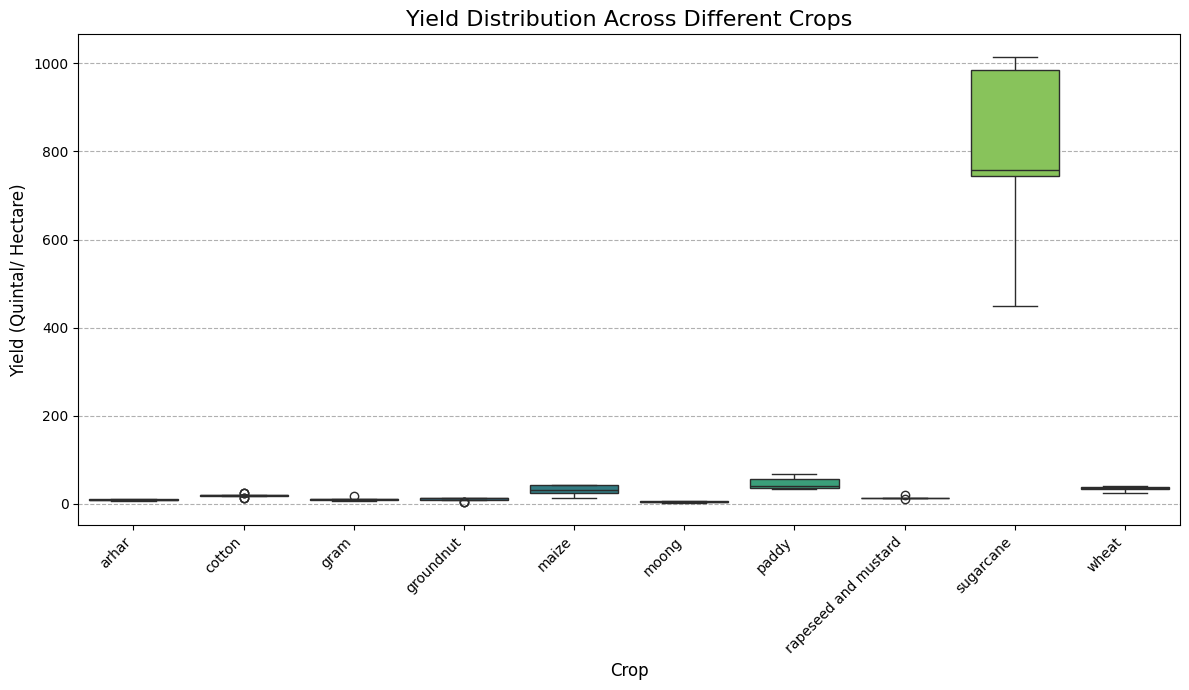

In [ ]:

# Plot 2: Yield Distribution Across Different Crops using a box plot
plt.figure(figsize=(12, 7))
sns.boxplot(x='Crop', y='Yield', data=merged_df, palette='viridis')
plt.title('Yield Distribution Across Different Crops', fontsize=16)
plt.xlabel('Crop', fontsize=12)
plt.ylabel('Yield (Quintal/ Hectare)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


In [12]:
#Practical Prediction on New Data

# Pick a random row from the merged dataset for a new prediction.
# We do not set a random_state here so the prediction is different each time.
random_row = merged_df.sample(n=1)
y_actual = random_row['Yield'].values[0]


X_new_data = pd.get_dummies(random_row.drop('Yield', axis=1), columns=['Crop', 'State', 'Variety', 'Season_Duration', 'Recommended_Zone'], drop_first=True)
X_new_data = X_new_data.reindex(columns=X.columns, fill_value=0)

# Use the best model to predict the yield for this new data
y_predicted = best_model.predict(X_new_data)[0]

print("\nPractical Prediction Example:")
print("-----------------------------")
print(f"Input data for prediction:\n{random_row.drop('Yield', axis=1).to_string(index=False)}")
print("\nPrediction Results:")
print(f"Actual Yield: {y_actual:.2f} Quintal/Hectare")
print(f"Predicted Yield: {y_predicted:.2f} Quintal/Hectare")



Practical Prediction Example:
-----------------------------
Input data for prediction:
 Crop         State  Cost_of_Cultivation_A2_FL  Cost_of_Cultivation_C2  Cost_of_Production_C2               Variety               Season_Duration                                                                                   Recommended_Zone
wheat Uttar Pradesh                   18979.38                31902.74                 769.84 VL Gehun 907 (VL 907) 167 irrigated   & 180 rainfed Himachal Pradesh,  Jammu & Kashmir, Uttarakhand and Sikkim under timely sown irrigated conditions.

Prediction Results:
Actual Yield: 34.99 Quintal/Hectare
Predicted Yield: 35.10 Quintal/Hectare
